# 1. Setup (Imports & Setting up device)

## 1.1 Imports

In [9]:
# Import necceserry libaries
import torch
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np

## 1.2 Setting devie agnostic code

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cpu


# 2. Create known parameters

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step). unsqueeze(dim=1)
y = weight * X + bias

# 3. Split into training & testing data

In [4]:
train_split = int(0.8 * len(X)) # Set train split to 80/20 and based on that, set how much training and testing data is  

In [5]:
X_train, y_train = X[:train_split], y[:train_split] # Define training data
X_test, y_test = X[train_split:], y[train_split:] # Define testing data

# 4. Make a function for plotting the training data, test data & predictions 

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

# 5. Create the Linear Regression Model 

In [11]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                                requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                            requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

## 5.1 Set manual seed

In [12]:
torch.manual_seed(42)

## 5.2 Create instance of the model

In [13]:
model_0 = LinearRegressionModel()

# 6. Making Predictions with torch.inference_mode()

In [14]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

# 6.1 Plot the predictions

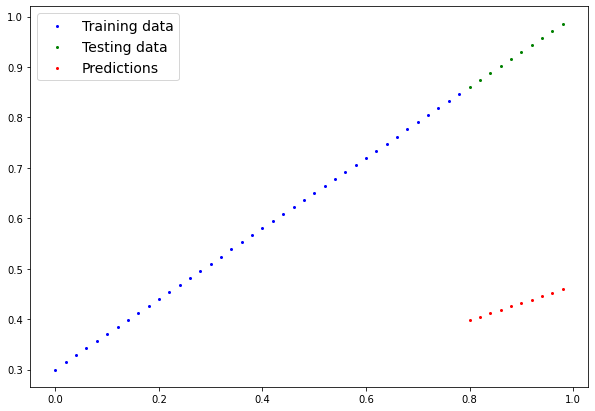

In [15]:
plot_predictions(predictions=y_preds)

# 7. Setup loss function & optimizer

In [16]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup an optimizer 
optimizer = torch.optim.SGD(
                            params=model_0.parameters(), 
                            lr=0.001 # the smaller the lr, the smaller the change in the parameters, the larger the lr, the bigger the change in the parameters
                            )

# 8. Training & testing the model (training loop + testing loop) 

In [17]:
# An epoch is one loop through data... (this is hyperparameter because we set it ourselves)
epochs = 4000

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range(epochs):

  model_0.train() # train mode in PyTorch sets all parameters that require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer 
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3 for the iteration of the loop

  ### Testing
  model_0.eval() # turn off gradient tracking
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass 
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

    # Print out what's happenin'    
    if epoch % (epochs//10) == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")    
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

print(f"Epoch: {epochs} | Loss: {loss} | Test loss: {test_loss}") 

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
Epoch: 400 | Loss: 0.04549176245927811 | Test loss: 0.11657620966434479
Epoch: 800 | Loss: 0.03122851625084877 | Test loss: 0.07297395914793015
Epoch: 1200 | Loss: 0.017490629106760025 | Test loss: 0.04084048420190811
Epoch: 1600 | Loss: 0.003752306802198291 | Test loss: 0.008672690019011497
Epoch: 2000 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 2400 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 2800 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 3200 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 3600 | Loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
Epoch: 4000 | Loss: 0.0007075972971506417 | Test loss: 0.0007690846687182784


# 9. Plotting the Predictions from the trained model

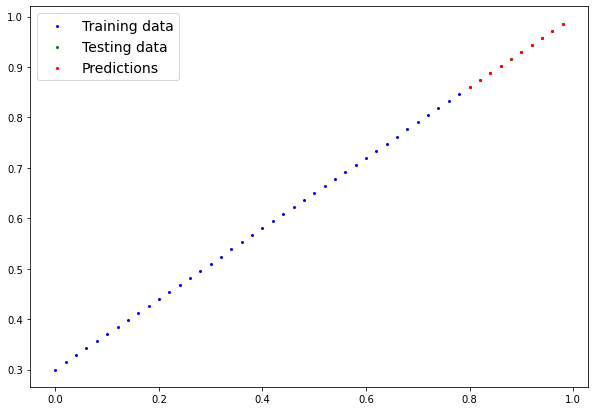

In [18]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    plot_predictions(predictions=y_preds)

# 10. Create the loss curves


## 10.1 Convert `loss_vaues`, `epoch_count` & `test_loss`


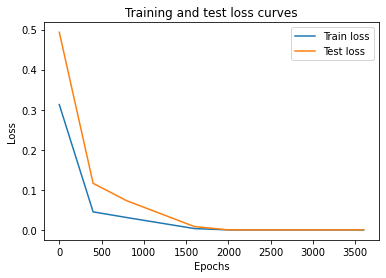

In [19]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 10.2 Creating the loss curves



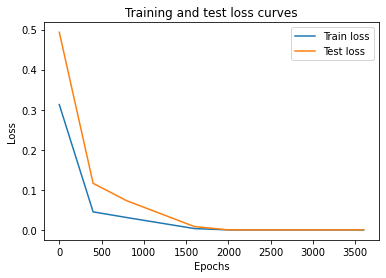

In [20]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# 11. Save the model

In [21]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create mode save path
MODEL_NAME = "LinearRegression_model3.pth" #  @param
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/LinearRegression_model3.pth


# 12. Load the model, test the loaded model & compare it to original model

In [22]:
loaded_model = LinearRegressionModel() # Set model type
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # Load the model
loaded_model.eval() # Set model to evaluation mode
loaded_model_y_preds = loaded_model(X_test) # Use the model on the testing data


## 12.1 Test the loaded model

tensor(0.0008, grad_fn=<MeanBackward0>)


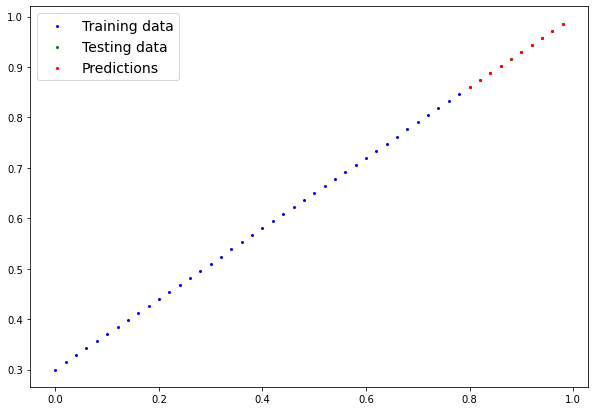

In [23]:
with torch.inference_mode(): 
    loaded_model_y_preds = loaded_model(X_test)
    plot_predictions(predictions=loaded_model_y_preds)
# 1. Do the forward pass
test_preds = model_0(X_test)

# 2. Calculate the loss
test_loss = loss_fn(test_preds, y_test)
print(test_loss)

## 12.2 Compare loaded model preds with orignal preds

In [24]:
loaded_model_y_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 13. Make predictions with the loaded model & plot the predictions

## 13.1 Make some model predictions

In [25]:
model_0.eval()
with torch.inference_mode():
  loaded_model_y_preds = model_0(X_test)

loaded_model_y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

## 13.2 Print the model predictions

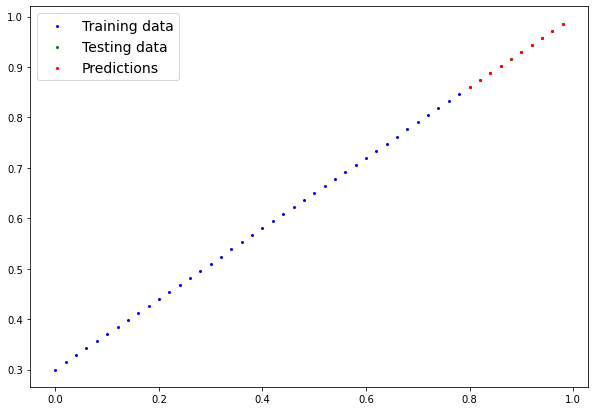

In [26]:
with torch.inference_mode():
  plot_predictions(predictions=loaded_model_y_preds)